# Observations:
    
    1)Dataset contains 1067 rows
    2)585 duplicates out of 1067 rows with 0 missing values
  

In [1]:
import pandas as pd
import requests
import json
from plotly import express as px
aut_url=r"https://authorization.iudx.org.in/auth/v1/token"
id='suratmunicipal.org/6db486cb4f720e8585ba1f45a931c63c25dbbbda/rs.iudx.org.in/surat-revenue-collection/party-plot-bookings'

header= {

'clientId':'27ee6918-cf1a-4601-a9d9-50106dd33085',
'clientSecret':'a4fcab465a4a6b1bed4e81f350a4db32b38d0c8a',
'Content-Type': 'application/json'
}
data='{"itemId":"suratmunicipal.org/6db486cb4f720e8585ba1f45a931c63c25dbbbda/rs.iudx.org.in/surat-revenue-collection/party-plot-bookings" ,"itemType": "resource","role": "consumer"}'

response=requests.post(url=aut_url,headers=header,data=data)
val=response.json()['results']['accessToken']


# query the api for year greater than 2019

In [2]:

#print(response.json())
url=f"https://rs.iudx.org.in/ngsi-ld/v1/entities?id={id}&q=year>=2019"
#url=f"https://rs.iudx.org.in/ngsi-ld/v1/entities/{id}"

header={
  'token':val,
  'Content-Type': 'application/json'
}
res=requests.get(url=url,headers=header)
res.json()

{'type': 200,
 'title': 'Success',
 'results': [{'month': 9,
   'date': '2022-09-03',
   'id': 'suratmunicipal.org/6db486cb4f720e8585ba1f45a931c63c25dbbbda/rs.iudx.org.in/surat-revenue-collection/party-plot-bookings',
   'totalCount': 14,
   'amountCollected': 141300,
   'year': 2022,
   'cityName': 'Surat'},
  {'month': 9,
   'date': '2022-09-02',
   'id': 'suratmunicipal.org/6db486cb4f720e8585ba1f45a931c63c25dbbbda/rs.iudx.org.in/surat-revenue-collection/party-plot-bookings',
   'totalCount': 7,
   'amountCollected': 127720,
   'year': 2022,
   'cityName': 'Surat'},
  {'month': 9,
   'year': 2022,
   'amountCollected': 0,
   'cityName': 'Surat',
   'date': '2022-09-01',
   'id': 'suratmunicipal.org/6db486cb4f720e8585ba1f45a931c63c25dbbbda/rs.iudx.org.in/surat-revenue-collection/party-plot-bookings',
   'totalCount': 0},
  {'month': 8,
   'date': '2022-08-03',
   'id': 'suratmunicipal.org/6db486cb4f720e8585ba1f45a931c63c25dbbbda/rs.iudx.org.in/surat-revenue-collection/party-plot-booki

In [3]:
res_list=res.json()['results']
with open('/home/rohit/iudx/dumps/surat-partyplot-dump.json','w') as fp:
    json.dump(res_list,fp)

In [4]:
df = pd.read_json(r'/home/rohit/iudx/dumps/surat-partyplot-dump.json',encoding = 'utf-8-sig')

In [5]:
df=df.sort_values(['year','month','amountCollected'],ascending=False)

# unique values

In [6]:
#df.nunique()

# Dataset Stats

In [7]:
# percentile list
perc =[.20, .40, .60, .80]
  
# list of dtypes to include
include =['datetime', 'int']
  
# calling describe method
data = df.describe(percentiles=perc,include=include)
  
# display
data

/tmp/ipykernel_43470/2221854823.py:8: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data = df.describe(percentiles=perc,include=include)


,month,date,totalCount,amountCollected,year
count,571.000000,571,571.000000,571.000000,571.000000
unique,NaN,526,NaN,NaN,NaN
top,NaN,2022-12-03 00:00:00,NaN,NaN,NaN
freq,NaN,2,NaN,NaN,NaN
first,NaN,2020-01-10 00:00:00,NaN,NaN,NaN
last,NaN,2022-12-04 00:00:00,NaN,NaN,NaN
mean,6.465849,NaN,6.229422,86712.924694,2021.145359
std,3.541752,NaN,19.054628,100582.624331,0.660854
min,1.000000,NaN,0.000000,0.000000,2020.000000
20%,3.000000,NaN,1.000000,2360.000000,2021.000000


In [8]:
initial=df.shape[0]

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 571 entries, 5 to 537
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   month            571 non-null    int64         
 1   date             571 non-null    datetime64[ns]
 2   id               571 non-null    object        
 3   totalCount       571 non-null    int64         
 4   amountCollected  571 non-null    int64         
 5   year             571 non-null    int64         
 6   cityName         571 non-null    object        
dtypes: datetime64[ns](1), int64(4), object(2)
memory usage: 35.7+ KB


# Missing Values

In [10]:
df.isnull().values.sum()

0

In [11]:
df.isnull().sum()

month              0
date               0
id                 0
totalCount         0
amountCollected    0
year               0
cityName           0
dtype: int64

# Duplicates

In [12]:
df.duplicated(subset=["date","amountCollected"], keep='first').sum()


0

In [13]:

df.to_csv('/home/rohit/iudx/dumps/surat-partyplot.csv',index=False)

In [14]:
df.tail(60)

,month,date,id,totalCount,amountCollected,year,cityName
478,11,2020-11-16,suratmunicipal.org/6db486cb4f720e8585ba1f45a93...,4,7080,2020,Surat
479,11,2020-11-22,suratmunicipal.org/6db486cb4f720e8585ba1f45a93...,4,7080,2020,Surat
480,11,2020-11-28,suratmunicipal.org/6db486cb4f720e8585ba1f45a93...,2,4720,2020,Surat
481,11,2020-11-30,suratmunicipal.org/6db486cb4f720e8585ba1f45a93...,1,2360,2020,Surat
482,10,2020-10-21,suratmunicipal.org/6db486cb4f720e8585ba1f45a93...,11,166720,2020,Surat
483,10,2020-10-12,suratmunicipal.org/6db486cb4f720e8585ba1f45a93...,9,141440,2020,Surat
484,10,2020-10-10,suratmunicipal.org/6db486cb4f720e8585ba1f45a93...,14,140360,2020,Surat
486,10,2020-10-25,suratmunicipal.org/6db486cb4f720e8585ba1f45a93...,3,140000,2020,Surat
487,10,2020-10-14,suratmunicipal.org/6db486cb4f720e8585ba1f45a93...,7,112000,2020,Surat
485,10,2020-10-23,suratmunicipal.org/6db486cb4f720e8585ba1f45a93...,6,97360,2020,Surat


In [15]:
df.drop_duplicates(subset =["date","amountCollected"],
                     keep = 'first', inplace = True)

# check for redundant sample

In [16]:
df[df['date']=='2021-12-08']

,month,date,id,totalCount,amountCollected,year,cityName
147,12,2021-12-08,suratmunicipal.org/6db486cb4f720e8585ba1f45a93...,4,121000,2021,Surat


In [17]:
post_removal=df.shape[0]



In [18]:
df.shape

(571, 7)

In [19]:
df.to_csv('/home/rohit/iudx/partyplot.csv',index=False)

# resample daily data to yearly

In [20]:
new_df=df.resample('Y',on='date').sum()

In [21]:
new_df=new_df.drop(['month','totalCount','year'],axis=1)

new_df.reset_index(inplace = True)

In [22]:
new_df['year']= new_df['date'].dt.year


In [23]:
new_df=new_df.drop('date',axis=1)

In [24]:
new_df.year=new_df.year.astype('str')

In [25]:
fig = px.bar(new_df, x='year', y='amountCollected',color='year')
fig.show


<bound method BaseFigure.show of Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': 'year=%{x}<br>amountCollected=%{y}<extra></extra>',
              'legendgroup': '2020',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '2020',
              'offsetgroup': '2020',
              'orientation': 'v',
              'showlegend': True,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['2020'], dtype=object),
              'xaxis': 'x',
              'y': array([7234820]),
              'yaxis': 'y'},
             {'alignmentgroup': 'True',
              'hovertemplate': 'year=%{x}<br>amountCollected=%{y}<extra></extra>',
              'legendgroup': '2021',
              'marker': {'color': '#EF553B', 'pattern': {'shape': ''}},
              'name': '2021',
              'offsetgroup': '2021',
              'orientation': 'v',
              'showlegend': True,
             

In [26]:
new_df

,amountCollected,year
0,7234820,2020
1,27030010,2021
2,15248250,2022


# resample daily data to monthly

In [27]:
new_df2=df.resample('M',on='date').sum()

In [28]:
new_df2=new_df2.drop(['month','year'],axis=1)

new_df2.reset_index(inplace = True)

In [29]:
new_df2

,date,totalCount,amountCollected
0,2020-01-31,11,213720
1,2020-02-29,10,106080
2,2020-03-31,19,335940
3,2020-04-30,6,97720
4,2020-05-31,20,334440
5,2020-06-30,18,304940
6,2020-07-31,14,276440
7,2020-08-31,16,281070
8,2020-09-30,46,926880
9,2020-10-31,84,1221750


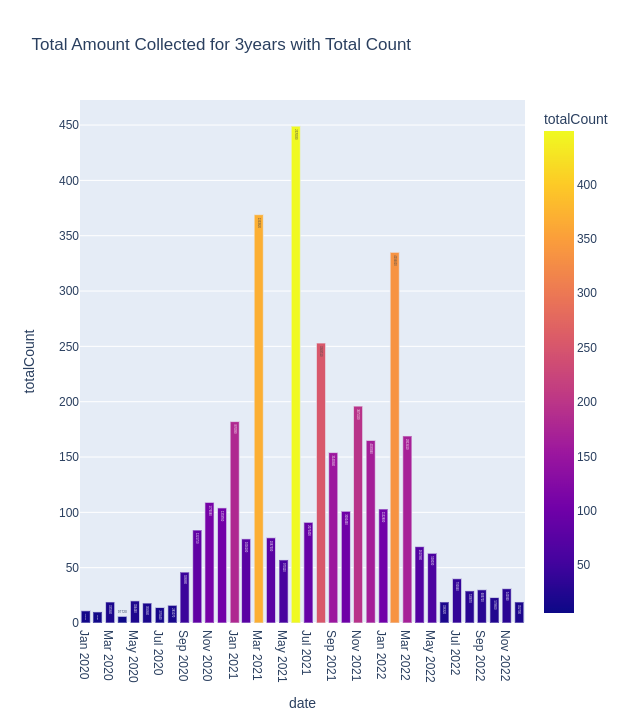

In [35]:
fig = px.bar(new_df2[0:], x='date', y='totalCount',text='amountCollected',title='Total Amount Collected for 3years with Total Count',color='totalCount',width=1280,height=720)
fig.layout.xaxis.tick0 = '2021-01-31'
fig.layout.xaxis.dtick = 'M2'
#month-year format
fig.layout.xaxis.tickformat='%b %Y'
#fig.write_image('/home/rohit/iudx/dumps/partyplot.png', scale=2)



fig.show()

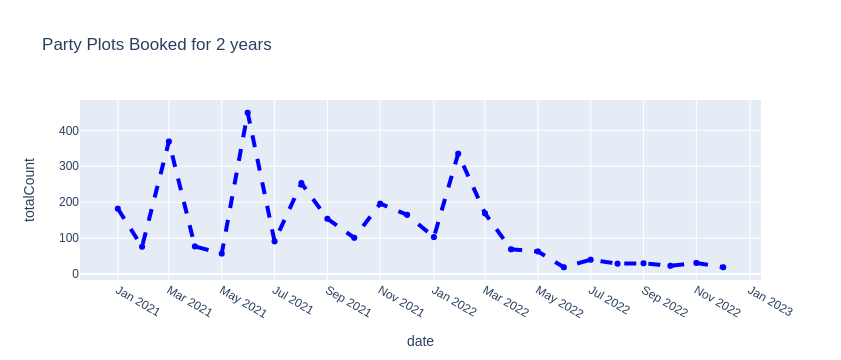

In [32]:
fig = px.line(new_df2[12:], x='date', y='totalCount',markers=True,title='Party Plots Booked for 2 years')
fig.layout.xaxis.tick0 = '2021-01-31'
fig.layout.xaxis.dtick = 'M2'
#month-year format
fig.layout.xaxis.tickformat='%b %Y'

#fig.update_traces(patch={"line": {"color": "green", "width": 4}})
fig.update_traces(patch={"line": {"color": "blue", "width": 4, "dash": 'dash'}}) 

fig.show()

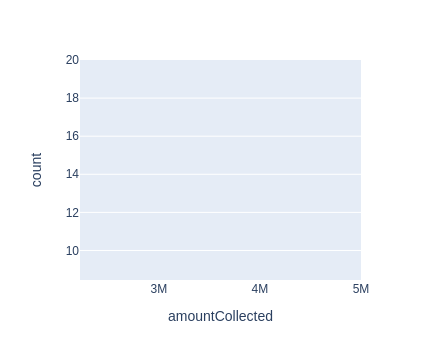

In [33]:
fig = px.histogram(new_df2[0:], x="amountCollected")
fig.show()

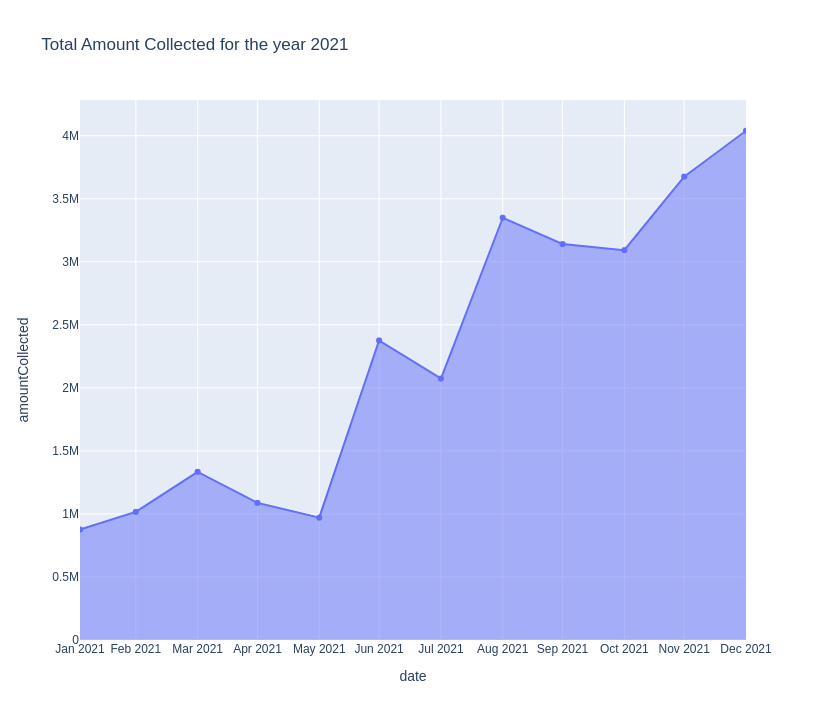

In [34]:
fig = px.area(new_df2[12:24], x='date', y='amountCollected',title='Total Amount Collected for the year 2021',width=1280,height=720,markers=True)
fig.layout.xaxis.tick0 = '2021-01-31'
fig.layout.xaxis.dtick = 'M1'
#month-year format
fig.layout.xaxis.tickformat='%b %Y'
#fig.write_image('/home/rohit/iudx/dumps/figure.png', scale=2)



fig.show()